Question 1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men


In [1]:
# Step 1
import pandas as pd


In [2]:
# Step 2
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

In [3]:
# Step 3
users = pd.read_csv(url,sep = '|')
users.head()


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
# Step 4. #mean age per occupation

users.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [5]:
# Step 5.
Mr = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)
Total = Mr[['F','M']].sum(axis=1)
Mr['Male ratio'] = round(100*Mr['M'] / Total)
print(Mr.sort_values(by=['Male ratio'],ascending = False))

gender          F    M  Male ratio
occupation                        
doctor          0    7       100.0
engineer        2   65        97.0
technician      1   26        96.0
retired         1   13        93.0
executive       3   29        91.0
programmer      6   60        91.0
scientist       3   28        90.0
entertainment   2   16        89.0
lawyer          2   10        83.0
salesman        3    9        75.0
educator       26   69        73.0
student        60  136        69.0
other          36   69        66.0
marketing      10   16        62.0
writer         19   26        58.0
none            4    5        56.0
administrator  36   43        54.0
artist         13   15        54.0
librarian      29   22        43.0
healthcare     11    5        31.0
homemaker       6    1        14.0


In [6]:
#Step 6.

users.groupby('occupation')['age'].agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [7]:
#Step 7.

users.groupby(['occupation','gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

Question 2
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per TeamStep 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start
with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [8]:
# 1
import pandas as pd

In [9]:
# 2
url2='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'

In [10]:
#3
euro12=pd.read_csv(url2)
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [11]:
#4
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [12]:
#5
euro12['Team'].count()

16

In [13]:
#6

len(euro12.columns)

35

In [14]:
#7

discipline=euro12[['Team','Yellow Cards','Red Cards']]
discipline.head()

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


In [15]:
#8

discipline.sort_values(by=['Red Cards','Yellow Cards'],ascending=False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [16]:
#9
euro12.groupby(['Team'])['Yellow Cards'].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [17]:
#10
euro12[euro12['Goals']>6]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [18]:
#11
euro12[euro12['Team'].str.contains('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [19]:
#12
euro12[euro12.columns[0:7]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [20]:
#13
euro12[euro12.columns[:-3]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [21]:
#14
accuracy=euro12[euro12.Team.isin(['England','Italy','Russia'])]
accuracy[['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


Question 3
Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299


In [22]:
# Step 1
import pandas as pd
import numpy as np

In [23]:
#Step 2.

series1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
series1

0     4
1     3
2     3
3     3
4     1
     ..
95    2
96    4
97    3
98    4
99    2
Length: 100, dtype: int32

In [24]:
series2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
series2

0     3
1     1
2     1
3     2
4     3
     ..
95    3
96    2
97    1
98    1
99    2
Length: 100, dtype: int32

In [25]:
series3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))
series3

0     21578
1     14160
2     12871
3     16992
4     15988
      ...  
95    27467
96    27902
97    10749
98    19015
99    26308
Length: 100, dtype: int32

In [26]:
#3

df = pd.DataFrame({'series1':series1,'series2':series2,'series3':series3})
df.head(10)

,series1,series2,series3
0,4,3,21578
1,3,1,14160
2,3,1,12871
3,3,2,16992
4,1,3,15988
5,2,3,29043
6,3,1,28042
7,1,3,22780
8,4,1,27431
9,3,1,16024


In [27]:
#4

df_new=df.rename(columns={'series1':'beds','series2':'bathrs', 'series3':'price_sqr_meter'})
df_new

,beds,bathrs,price_sqr_meter
0,4,3,21578
1,3,1,14160
2,3,1,12871
3,3,2,16992
4,1,3,15988
...,...,...,...
95,2,3,27467
96,4,2,27902
97,3,1,10749
98,4,1,19015


In [28]:
#5
bigcolumn = df_new['beds'].append(df_new['bathrs'].append(df_new['price_sqr_meter']))
bigcolumn

C:\Program Files\KMSpico\temp\ipykernel_852\2242074755.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bigcolumn = df_new['beds'].append(df_new['bathrs'].append(df_new['price_sqr_meter']))


0         4
1         3
2         3
3         3
4         1
      ...  
95    27467
96    27902
97    10749
98    19015
99    26308
Length: 300, dtype: int32

In [29]:
#6
if (max(bigcolumn.index)==99):
    print('True')
else:
    print('False')

True


In [30]:
#7
bigcolumn.reset_index(drop=True)
bigcolumn

0         4
1         3
2         3
3         3
4         1
      ...  
95    27467
96    27902
97    10749
98    19015
99    26308
Length: 300, dtype: int32

Question 4

In [46]:
#1
import numpy as np
import pandas as pd
import os

In [47]:
#2
data = pd.read_csv ('wind.txt', sep = '\s+')

In [48]:
#3
data.rename(columns = {'Yr':'year', 'Mo':'month', 'Dy':'day'},inplace =True)
data['year'] = ['19%i' % i for i in data['year']]
combinedate = pd.to_datetime(data[['year','month','day']])
data.insert(loc = 0, column = 'date', value = combinedate)
data = data.drop(columns = ['year','month','day'])
data.head()


,date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [49]:
#5
data.dtypes

date    datetime64[ns]
RPT            float64
VAL            float64
ROS            float64
KIL            float64
SHA            float64
BIR            float64
DUB            float64
CLA            float64
MUL            float64
CLO            float64
BEL            float64
MAL            float64
dtype: object

In [50]:
#6
data.isnull().sum()

date    0
RPT     6
VAL     3
ROS     2
KIL     5
SHA     2
BIR     0
DUB     3
CLA     2
MUL     3
CLO     1
BEL     0
MAL     4
dtype: int64

In [51]:
data = data.dropna()

In [52]:
#7
data.count()

date    6546
RPT     6546
VAL     6546
ROS     6546
KIL     6546
SHA     6546
BIR     6546
DUB     6546
CLA     6546
MUL     6546
CLO     6546
BEL     6546
MAL     6546
dtype: int64

In [53]:
#8
wind = data.drop(columns = ['date'])
pd.Series(wind.mean())

RPT    12.359979
VAL    10.640267
ROS    11.656396
KIL     6.298587
SHA    10.448923
BIR     7.085066
DUB     9.793006
CLA     8.486601
MUL     8.490257
CLO     8.696705
BEL    13.110668
MAL    15.603129
dtype: float64

In [54]:
#9
maxspeed = pd.Series(wind.max())
minspeed = pd.Series(wind.min())
stdspeed = pd.Series(wind.std())

loc_stats = pd.DataFrame({'max':maxspeed, 'min':minspeed, 'mean':pd.Series(wind.mean()), 'std':stdspeed})
loc_stats

,max,min,mean,std
RPT,35.80,0.67,12.359979,5.618805
VAL,33.37,0.21,10.640267,5.268695
ROS,33.84,1.50,11.656396,5.007805
KIL,28.46,0.00,6.298587,3.600942
SHA,37.54,0.13,10.448923,4.933988
BIR,26.16,0.00,7.085066,3.967735
DUB,30.37,0.00,9.793006,4.978030
CLA,31.08,0.00,8.486601,4.498299
MUL,25.88,0.00,8.490257,4.165947
CLO,28.21,0.04,8.696705,4.500488


In [55]:
#12
df1=data.groupby(data['date'].dt.year).sum()
df1

C:\Program Files\KMSpico\temp\ipykernel_852\1409877738.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1=data.groupby(data['date'].dt.year).sum()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961,4150.58,3470.45,3836.17,2327.79,3652.53,2589.83,3275.31,2952.87,2914.46,3298.16,4512.33,4619.65
1962,4443.47,3674.61,4240.60,2521.09,3870.60,2684.35,3997.61,3196.39,3017.47,3509.16,4700.82,5198.84
1963,4676.91,3955.50,4577.52,2675.47,4279.30,3078.67,4042.63,3772.84,3249.81,3731.92,4978.19,5474.64
1964,4525.10,3996.78,4430.20,2484.33,4192.34,2770.94,3754.85,3465.05,2850.78,3736.11,5029.04,5457.17
1965,4544.75,4042.57,4324.80,2503.34,4024.05,2729.51,3875.83,3241.17,2886.21,3620.10,4731.95,5690.95
1966,4913.62,4218.38,4387.53,2681.19,4308.84,2844.69,3861.63,3224.81,3107.77,3565.67,5207.03,5952.15
1967,4649.06,4011.71,4284.88,2607.35,4245.22,2689.38,3887.99,3403.85,3155.43,3484.81,5392.71,6254.62
1968,4331.84,3831.36,4175.97,2370.83,3938.44,2220.64,3242.46,3021.52,2644.33,2866.87,4687.96,5496.40
1969,4075.72,3549.15,3979.23,2105.31,3603.98,2259.34,3126.04,2814.66,2892.45,2830.35,4606.75,5753.46


In [56]:
#13
df2=data
df2.groupby([data['date'].dt.year.rename('year'),data['date'].dt.month.rename('month')]).sum()

C:\Program Files\KMSpico\temp\ipykernel_852\1755172488.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby([data['date'].dt.year.rename('year'),data['date'].dt.month.rename('month')]).sum()


RPT     VAL     ROS     KIL     SHA     BIR     DUB     CLA  \
year month                                                                   
1961 1      377.16  291.86  336.97  177.84  273.24  212.53  270.48  225.44   
     2      426.45  390.97  376.22  240.31  358.23  283.00  308.57  305.40   
     3      287.82  299.63  281.34  191.72  277.17  231.66  245.93  251.89   
     4      321.68  282.83  299.94  174.92  253.05  194.85  207.76  212.84   
     5      280.69  237.88  295.10  167.79  265.45  185.75  214.08  229.79   
...            ...     ...     ...     ...     ...     ...     ...     ...   
1978 8      299.00  256.04  280.00  139.59  228.41  183.99  175.16  167.95   
     9      327.41  326.85  319.05  171.75  311.16  278.35  323.71  287.49   
     10     306.83  268.80  288.17  146.36  264.28  210.00  251.58  227.47   
     11     484.55  444.08  405.24  219.52  344.25  262.29  344.77  289.72   
     12     501.44  426.19  484.69  219.94  353.36  286.49  374.40  316.04   

               MUL     CLO     BEL     MAL  
year month                                  
1961 1      216.41  246.75  345.02  372.88  
     2      305.46  328.29  472.29  397.82  
     3      272.70  296.72  433.79  416.31  
     4      220.27  217.11  334.42  308.35  
     5      227.38  238.97  333.54  333.53  
...            ...     ...     ...     ...  
1978 8      224.48  171.64  324.47  373.68  
     9      302.08  268.17  470.41  581.74  
     10     257.23  255.56  427.08  531.65  
     11     321.04  320.28  522.14  621.69  
     12     329.12  341.89  429.65  662.52  

[216 rows x 12 columns]

Question 5


In [31]:
#Step 1

import pandas as pd
import numpy as np

In [32]:
#2 #3

chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep= '\t')

In [33]:
#4


chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [34]:
#5
chipo.shape[0]

4622

In [35]:
#6

chipo.shape[1]

5

In [36]:
#7

c=chipo.columns
c

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [37]:
#8
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [38]:
#9 #10
chipo['item_name'].value_counts()


Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [39]:
#9 Chicken Bowl
#10 726

In [40]:
#11 
chipo['choice_description'].value_counts()

[Diet Coke]                                                                                                                                      134
[Coke]                                                                                                                                           123
[Sprite]                                                                                                                                          77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                                                                            42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]                                                                 40
                                                                                                                                                ... 
[Fresh Tomato Salsa (Mild), [Pinto Beans, Black Beans, Rice, Cheese, Sour Cream, Lettuce]]                

In [41]:
#12.

chipo['quantity'].sum()

4972

In [42]:
# 13

chipo1 = chipo.copy()
chipo1['item_price'] = chipo1['item_price'].str[1:]
chipo1.astype({'item_price':'float64'}).dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [43]:
chipo2 = chipo.copy()
chipo2['item_price'] = chipo2['item_price'].apply(lambda x: float(x[1:]))
chipo2.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [44]:
#14
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo['revenue_per_order'] = chipo['quantity'] * chipo['item_price']
chipo['revenue_per_order'].sum()

39237.02

In [45]:
#17
chipo['item_name'].nunique()

50

Question 6

In [57]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plts

In [58]:
df=pd.read_csv('us-marriages-divorces-1867-2014.csv')
df.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


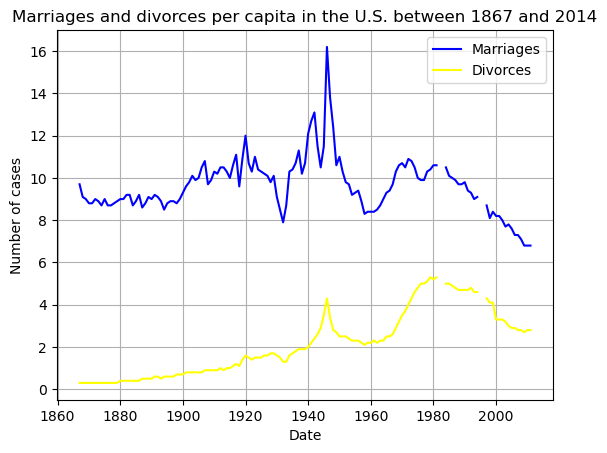

In [59]:
plts.plot(df['Year'], df['Marriages_per_1000'], color='blue', label='Marriages')
plts.plot(df['Year'], df['Divorces_per_1000'],color='yellow', label='Divorces')
plts.xlabel('Date')
plts.ylabel('Number of cases')
plts.title('Marriages and divorces per capita in the U.S. between 1867 and 2014')
plts.grid(True)
plts.legend()

Question 7

Text(0.5, 1.0, 'US Marriages & Divorces')

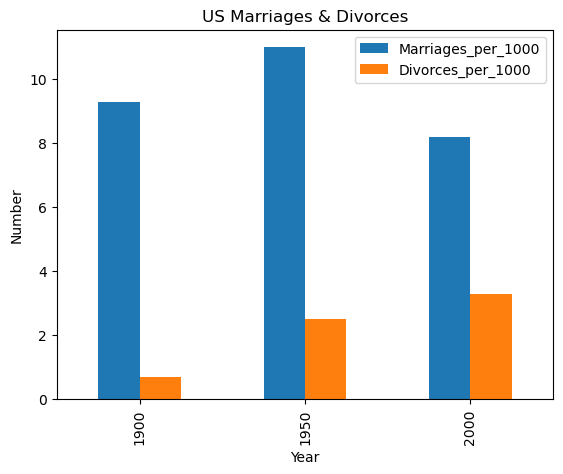

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

us_marriage = pd.read_csv('us-marriages-divorces-1867-2014.csv')
new_us_marriage = us_marriage[(us_marriage.Year == 1900) | (us_marriage.Year == 1950) | (us_marriage.Year == 2000)]
new_us_marriage = new_us_marriage.drop(columns = ['Marriages', 'Divorces', 'Population'])
new_us_marriage = new_us_marriage.set_index('Year')
new_us_marriage.plot.bar()
plt.xlabel('Year')
plt.ylabel('Number')
plt.title('US Marriages & Divorces')

Question 8

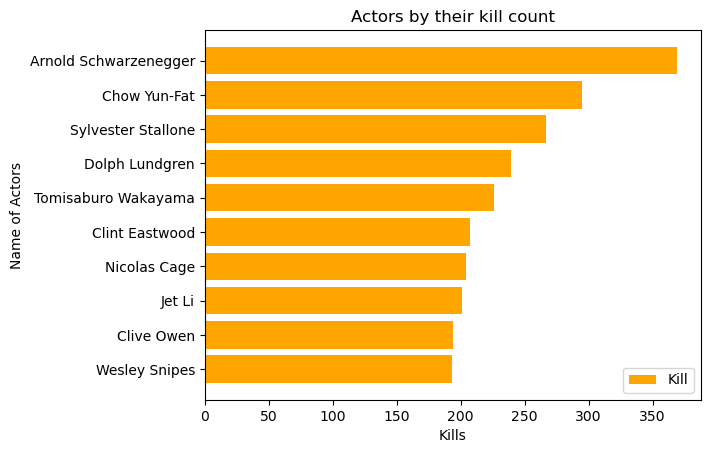

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

kill = pd.read_csv('actor_kill_counts.csv')
kill = kill.sort_values(by="Count")


plt.barh(kill['Actor'], kill['Count'],  color='orange', label='Kill')
plt.xlabel('Kills')
plt.ylabel('Name of Actors')
plt.title('Actors by their kill count')
plt.legend()
plt.show()


Question 9

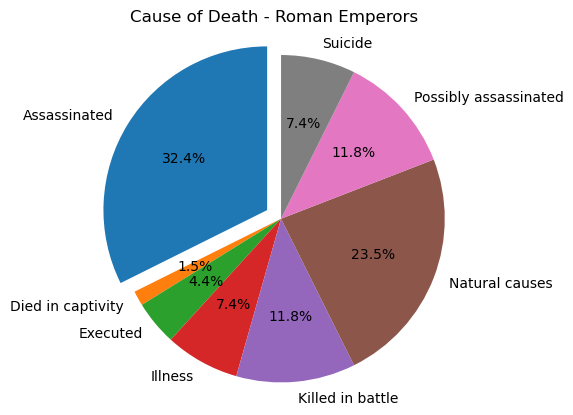

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

roman = pd.read_csv('roman-emperor-reigns.csv')
death = roman.groupby('Cause_of_Death').count()[['Emperor']]
#cause_Ofdeath
emperor = pd.Series(death['Emperor'])
cause = pd.Series(death.index)
explode = (0.1,0,0,0,0,0,0,0)
fig2, ax2 = plt.subplots()
ax2.pie(emperor, explode=explode, labels=cause,autopct='%1.1f%%', shadow=False, startangle=90)
ax2.axis('equal')
plt.title('Cause of Death - Roman Emperors')
plt.show()

Question 10

Text(0.5, 1.0, 'Scatter chart of Total Arcade Revenue and the number of PhDs awarded in the U.S.')

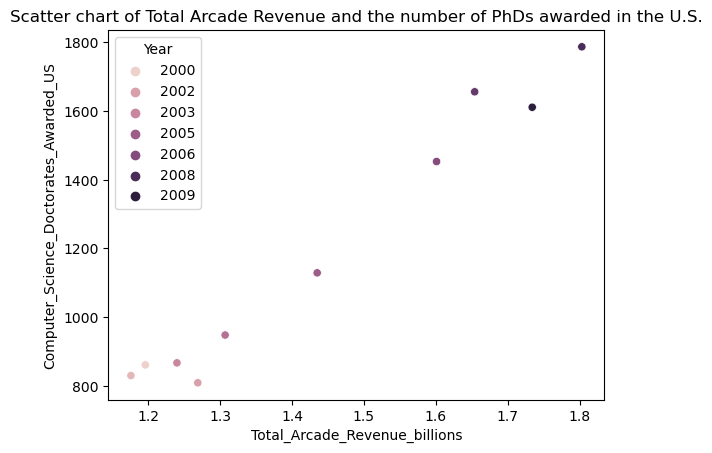

In [64]:
import seaborn as sb

earned = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
earned = earned.rename(columns={'Total Arcade Revenue (billions)': 'Total_Arcade_Revenue_billions', 'Computer Science Doctorates Awarded (US)': 'Computer_Science_Doctorates_Awarded_US'})

axis = sb.scatterplot(x='Total_Arcade_Revenue_billions', y='Computer_Science_Doctorates_Awarded_US', hue="Year", data=earned)
axis.set_title('Scatter chart of Total Arcade Revenue and the number of PhDs awarded in the U.S.')